In [1]:
import datetime
from datetime import date
from datetime import datetime
import requests
import pprint
from bs4 import BeautifulSoup
import pandas as pd
import re
import pickle
from urllib.request import urlopen
import glob
# import altair as alt
import time
import itertools
import numpy as np
import operator
import sys

pd.options.display.max_columns = 1000

# Player Profile Information

In [4]:
#Getting Player Info Files
# Sravan's paths
player_info_england = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_data_df_england.csv')
player_info_italy = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_data_df_italy.csv')
player_info_spain = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_data_df_spain.csv')
player_info_france = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_data_df_france.csv')
player_info_germany = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_data_df_germany.csv')

# Sravan's AWS
# player_info_england = pd.read_csv('Dataframes/player_data_df_england.csv')
# player_info_italy = pd.read_csv('Dataframes/player_data_df_italy.csv')
# player_info_spain = pd.read_csv('Dataframes/player_data_df_spain.csv')
# player_info_france = pd.read_csv('Dataframes/player_data_df_france.csv')
# player_info_germany = pd.read_csv('Dataframes/player_data_df_germany.csv')

# Renzo's paths
# player_info_england = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_data_df_england.csv')
# player_info_italy = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_data_df_italy.csv')
# player_info_spain = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_data_df_spain.csv')
# player_info_france = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_data_df_france.csv')
# player_info_germany = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_data_df_germany.csv')

# Victor's Paths
# player_info_england = pd.read_csv('G:/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_data_df_england.csv')
# player_info_italy = pd.read_csv('G:/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_data_df_italy.csv')
# player_info_spain = pd.read_csv('G:/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_data_df_spain.csv')
# player_info_france = pd.read_csv('G:/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_data_df_france.csv')
# player_info_germany = pd.read_csv('G:/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_data_df_germany.csv')


In [7]:
# Load TM Profile Datasets

df_1 = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_profile_df_1.csv')
df_2 = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_profile_df_2.csv')
df_3 = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_profile_df_3.csv')

tm_profile_df = pd.concat([df_1, df_2])
tm_profile_df = pd.concat([tm_profile_df, df_3])

In [8]:
tm_profile_df.shape

(12902, 41)

In [9]:
tm_profile_df.head()

,Place of birth:,Citizenship:,Height:,Position:,Contract expires:,Former International:,Caps/Goals:,League level:,Joined:,Contract until:,name,TMId,Date of birth,Last club:,Most games for:,Unknown since:,Date of birth:,Age:,Foot:,Player agent:,Current club:,Agent:,National player:,Name in home country:,Outfitter:,Current international:,Social-Media:,Full name:,On loan from:,Contract there expires:,Contract option:,Retired since:,club:,Without Club since:,2nd club:,country:,Company:,Date of death:,Career break since:,3nd club:,Ban since:
0,Plzeň,Czech Republic,"1,96 m",Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Petr Cech,5658,NaN,Arsenal,Chelsea,NaN,"May 20, 1982",39.0,left,SPORT INVEST,Retired,NaN,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Bishop Auckland,England,"1,93 m",Goalkeeper,-,England U19,8/0,NaN,"Jul 1, 2017",NaN,Ross Turnbull,29159,NaN,Leeds,NaN,NaN,"Jan 4, 1985",36.0,right,NaN,Retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2017",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,São Pedro da Cova,Portugal,"1,89 m",Goalkeeper,-,Portugal,1/0,NaN,"Jul 1, 2014",NaN,Henrique Hilário,13886,NaN,Chelsea,NaN,NaN,"Oct 21, 1975",46.0,right,Gestifute,Retired,Gestifute,NaN,Henrique Hilário Meireles Alves Sampaio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2014",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,London,England,"1,87 m",Defender - Centre-Back,-,England,78/6,NaN,"Oct 7, 2018",NaN,John Terry,3160,NaN,Aston Villa,Chelsea,NaN,"Dec 7, 1980",40.0,right,Elite Management Agency,Retired,NaN,NaN,John George Terry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Oct 7, 2018",Aston Villa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sremska Mitrovica,Serbia,"1,85 m",Defender - Centre-Back,-,Serbia,105/13,NaN,"Jul 1, 2021",NaN,Branislav Ivanovic,36827,NaN,West Brom,Chelsea,NaN,"Feb 22, 1984",37.0,right,Star Management Signings Ltd.,Without Club,NaN,NaN,Бранислав Ивановић,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2021",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
player_inf_lst = [player_info_england, player_info_italy, player_info_spain, player_info_france, player_info_germany]
player_info_df = pd.concat(player_inf_lst)
player_info_df.shape

(35827, 15)

In [11]:
# Cleaning repeated players

player_info_df_nodups = player_info_df.drop_duplicates()
print(len(player_info_df))
print(len(player_info_df_nodups))

35827
10720


# Player Injuries Information

In [12]:
#Loading Player Injuries

# Sravan's Path
player_injuries_df = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_injuries_df.csv')

# Sravan's AWS Path
# player_injuries_df = pd.read_csv('Dataframes/player_injuries_df.csv')

# Renzo's Path
# player_injuries_df = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_injuries_df.csv')

# Victor's Path
# player_injuries_df = pd.read_csv('G:/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_injuries_df.csv')


len(player_injuries_df)

55216

In [13]:
print(player_injuries_df.columns)
print(player_info_df_nodups.columns)

Index(['Season', 'Injury', 'from', 'until', 'Days', 'Games missed', 'TMId',
       'name'],
      dtype='object')
Index(['FBRefId', 'PlayerName', 'PlayerFullName', 'Nationality', 'Photo',
       'Birth', 'Height', 'Weight', 'Position', 'Foot', 'FootAbility',
       'InternationalReputation', 'PlayerUrl', 'Twitter', 'Instagram'],
      dtype='object')


In [14]:
# Load TMID to FBRefID reference table

# Sravan's Path
fbref_to_tm_df = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/CSV files/fbref_to_tm_mapping.csv', encoding='latin-1')

# Renzo's Path
# fbref_to_tm_df = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/CSV files/fbref_to_tm_mapping.csv')

# Victor's Path
# fbref_to_tm_df = pd.read_csv('G:/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/CSV files/fbref_to_tm_mapping.csv', encoding='latin-1')


In [15]:
# Stripping FBRefID and TMID from other information and creating individual columns for them

fbref_to_tm_df['FBRefID'] = fbref_to_tm_df['UrlFBref'].str.split('/').str[5]
fbref_to_tm_df['TMID'] = fbref_to_tm_df['UrlTmarkt'].str.split('/').str[6]

fbref_to_tm_df.head()


,PlayerFBref,UrlFBref,UrlTmarkt,TmPos,FBRefID,TMID
0,Aaron Connolly,https://fbref.com/en/players/27c01749/Aaron-Co...,https://www.transfermarkt.com/aaron-connolly/p...,Centre-Forward,27c01749,434207
1,Aaron Cresswell,https://fbref.com/en/players/4f974391/Aaron-Cr...,https://www.transfermarkt.com/aaron-cresswell/...,Left-Back,4f974391,92571
2,AarÃ³n Escandell,https://fbref.com/en/players/67669ce7/Aaron-Es...,https://www.transfermarkt.com/aaron-escandell/...,Goalkeeper,67669ce7,284430
3,Aaron Herzog,https://fbref.com/en/players/565c3fe4/Aaron-He...,https://www.transfermarkt.com/aaron-herzog/pro...,Attacking Midfield,565c3fe4,276566
4,Aaron Hickey,https://fbref.com/en/players/1780bb4a/Aaron-Hi...,https://www.transfermarkt.com/aaron-hickey/pro...,Left-Back,1780bb4a,591949


In [16]:
fbref_to_tm_df.head()

,PlayerFBref,UrlFBref,UrlTmarkt,TmPos,FBRefID,TMID
0,Aaron Connolly,https://fbref.com/en/players/27c01749/Aaron-Co...,https://www.transfermarkt.com/aaron-connolly/p...,Centre-Forward,27c01749,434207
1,Aaron Cresswell,https://fbref.com/en/players/4f974391/Aaron-Cr...,https://www.transfermarkt.com/aaron-cresswell/...,Left-Back,4f974391,92571
2,AarÃ³n Escandell,https://fbref.com/en/players/67669ce7/Aaron-Es...,https://www.transfermarkt.com/aaron-escandell/...,Goalkeeper,67669ce7,284430
3,Aaron Herzog,https://fbref.com/en/players/565c3fe4/Aaron-He...,https://www.transfermarkt.com/aaron-herzog/pro...,Attacking Midfield,565c3fe4,276566
4,Aaron Hickey,https://fbref.com/en/players/1780bb4a/Aaron-Hi...,https://www.transfermarkt.com/aaron-hickey/pro...,Left-Back,1780bb4a,591949


In [17]:
# converting TMId to string in player_injuries_df

player_injuries_df['TMId'] = player_injuries_df['TMId'].astype(str)
# player_injuries_df.head()

In [18]:
# Merging on intersection of player_injuries_df and fbref_to_tm_df on columns TMId and TMID respectively

player_injuries_df_2 = pd.merge(left=player_injuries_df, right=fbref_to_tm_df, left_on='TMId', right_on='TMID', how='inner')

# player_injuries_df_2.head()

In [19]:
# Determining number of unique player in our data

print(player_injuries_df_2.shape)
len(player_injuries_df_2['name'].unique())


(32660, 14)


4614

In [20]:
player_injuries_df_2.head()

,Season,Injury,from,until,Days,Games missed,TMId,name,PlayerFBref,UrlFBref,UrlTmarkt,TmPos,FBRefID,TMID
0,18/19,Hamstring Injury,"Sep 29, 2018","Oct 27, 2018",28 days,5,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658
1,16/17,Calf Strain,"Mar 18, 2017","Apr 17, 2017",30 days,5,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658
2,15/16,Calf Injury,"Mar 3, 2016","Mar 31, 2016",28 days,5,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658
3,14/15,Neck Injury,"May 11, 2015","May 25, 2015",14 days,2,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658
4,13/14,Shoulder Injury,"Apr 24, 2014","Jul 17, 2014",84 days,4,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658


In [21]:
# removing duplicates from player_info_df

player_info_df = player_info_df.drop_duplicates()

In [22]:
player_info_df.head()

,FBRefId,PlayerName,PlayerFullName,Nationality,Photo,Birth,Height,Weight,Position,Foot,FootAbility,InternationalReputation,PlayerUrl,Twitter,Instagram
0,3bb7b8b4,Ederson,Ederson Santana de Moraes,Brazil,https://fbref.com/req/202005121/images/headsho...,"August 17, 1993",188.0,89.0,GK,LEFT,82.0,5x Domestic League Champion,https://fbref.com/en/players/3bb7b8b4/Ederson,https://twitter.com/edersonmoraes93,https://instagram.com/ederson93/
1,31c69ef1,Rúben Dias,Rúben Dias,Portugal,https://fbref.com/req/202005121/images/headsho...,"May 14, 1997",186.0,82.0,DF (CB),RIGHT,84.0,2x Domestic League Champion,https://fbref.com/en/players/31c69ef1/Ruben-Dias,NaN,https://instagram.com/rubendias/
2,6434f10d,Rodri,Rodrigo Hernández Cascante,Spain,https://fbref.com/req/202005121/images/headsho...,"June 22, 1996",190.0,78.0,MF (CM-DM),RIGHT,85.0,2020-21 Premier League Champion,https://fbref.com/en/players/6434f10d/Rodri,NaN,NaN
3,b400bde0,Raheem Sterling,Raheem Shaquille Sterling,Jamaica,https://fbref.com/req/202005121/images/headsho...,"December 8, 1994",170.0,70.0,FW-MF (AM-WM),RIGHT,88.0,3x Premier League Champion||2018-19 FWA Footba...,https://fbref.com/en/players/b400bde0/Raheem-S...,https://twitter.com/sterling7,https://instagram.com/sterling7/
4,bd6351cd,João Cancelo,João Pedro Cavaco Cancelo,Portugal,https://fbref.com/req/202005121/images/headsho...,"May 27, 1994",182.0,66.0,"DF-MF (CB-FB, right)",RIGHT,87.0,2x Domestic League Champion,https://fbref.com/en/players/bd6351cd/Joao-Can...,NaN,https://instagram.com/jcancelo2/


In [23]:
# Merging Player Injuries with FBRef Profiles

player_injuries_info_df = pd.merge(left=player_injuries_df_2, right=player_info_df, left_on='FBRefID', right_on='FBRefId', how='inner')

In [24]:
player_injuries_info_df.shape

(32584, 29)

In [25]:
# finding number of unique players
 
len(player_injuries_info_df['name'].unique())

4586

In [26]:
# Merge with TM Profile information

tm_profile_df['TMId'] = tm_profile_df['TMId'].astype(str)
player_injuries_profile_final = pd.merge(left=player_injuries_info_df, right=tm_profile_df, left_on='TMId', right_on='TMId', how='inner')
player_injuries_profile_final.head()

,Season,Injury,from,until,Days,Games missed,TMId,name_x,PlayerFBref,UrlFBref,UrlTmarkt,TmPos,FBRefID,TMID,FBRefId,PlayerName,PlayerFullName,Nationality,Photo,Birth,Height,Weight,Position,Foot,FootAbility,InternationalReputation,PlayerUrl,Twitter,Instagram,Place of birth:,Citizenship:,Height:,Position:,Contract expires:,Former International:,Caps/Goals:,League level:,Joined:,Contract until:,name_y,Date of birth,Last club:,Most games for:,Unknown since:,Date of birth:,Age:,Foot:,Player agent:,Current club:,Agent:,National player:,Name in home country:,Outfitter:,Current international:,Social-Media:,Full name:,On loan from:,Contract there expires:,Contract option:,Retired since:,club:,Without Club since:,2nd club:,country:,Company:,Date of death:,Career break since:,3nd club:,Ban since:
0,18/19,Hamstring Injury,"Sep 29, 2018","Oct 27, 2018",28 days,5,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658,71672fa0,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,"1,96 m",Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Petr Cech,NaN,Arsenal,Chelsea,NaN,"May 20, 1982",39.0,left,SPORT INVEST,Retired,NaN,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16/17,Calf Strain,"Mar 18, 2017","Apr 17, 2017",30 days,5,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658,71672fa0,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,"1,96 m",Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Petr Cech,NaN,Arsenal,Chelsea,NaN,"May 20, 1982",39.0,left,SPORT INVEST,Retired,NaN,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15/16,Calf Injury,"Mar 3, 2016","Mar 31, 2016",28 days,5,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658,71672fa0,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,"1,96 m",Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Petr Cech,NaN,Arsenal,Chelsea,NaN,"May 20, 1982",39.0,left,SPORT INVEST,Retired,NaN,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14/15,Neck Injury,"May 11, 2015","May 25, 2015",14 days,2,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658,71672fa0,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,"1,96 m",Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Petr Cech,NaN,Arsenal,Chelsea,NaN,"May 20, 1982",39.0,left,SPORT INVEST,Retired,NaN,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13/14,Shoulder Injury,"Apr 24, 2014","Jul 17, 2014",84 days,4,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfe

In [27]:
# Creating new columns of the week and year a player gets injured as well as the week the player is released

player_injuries_profile_final = player_injuries_profile_final[player_injuries_profile_final['from'] != '-']
player_injuries_profile_final = player_injuries_profile_final[player_injuries_profile_final['until'] != '-']
player_injuries_profile_final['injury_year'] = player_injuries_profile_final['from'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').year)
player_injuries_profile_final['injury_week'] = player_injuries_profile_final['from'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%V'))
player_injuries_profile_final['release_week'] = player_injuries_profile_final['until'].apply(lambda x: datetime.strptime(x, '%b %d, %Y').strftime('%V'))
player_injuries_profile_final['from'] = pd.to_datetime(player_injuries_profile_final['from'])
player_injuries_profile_final['until'] = pd.to_datetime(player_injuries_profile_final['until'])

In [28]:
# Exploding Dataframe to weekly basis - get rows for every week of the injury

def ran_week(row):
        return list(pd.date_range(row['from'], row['until'], freq='w'))

# def ran_year(row):
    # return list(pd.date_range(row['from'], row['until'], freq='y'))

player_injuries_profile_final['injury_week'] = player_injuries_profile_final['injury_week'].astype(int)
player_injuries_profile_final['release_week'] = player_injuries_profile_final['release_week'].astype(int)
player_injuries_profile_final['current_week'] = player_injuries_profile_final.apply(ran_week, axis = 1)
# player_injuries_profile_final['current_year'] = player_injuries_profile_final.apply(ran_year, axis = 1)

In [29]:
player_injuries_profile_final = player_injuries_profile_final.explode('current_week')

In [30]:
player_injuries_profile_final = player_injuries_profile_final.reset_index(drop=True)
player_injuries_profile_final.loc[pd.isna(player_injuries_profile_final['current_week']), 'current_week'] = player_injuries_profile_final['from']

In [31]:
# player_injuries_profile_final[player_injuries_profile_final['name_x'] == 'Petr Cech'].tail(60)
player_injuries_profile_final = player_injuries_profile_final.rename({'current_week':'current_date'}, axis=1)

In [32]:
player_injuries_profile_final['current_year'] = player_injuries_profile_final['current_date'].apply(lambda x: x.year)#strftime('%W'))
player_injuries_profile_final['current_week'] = player_injuries_profile_final['current_date'].apply(lambda x: x.week)

In [33]:
player_injuries_profile_final['current_week'] = player_injuries_profile_final['current_week'].fillna(player_injuries_profile_final['injury_week'])
player_injuries_profile_final['current_year'] = player_injuries_profile_final['current_year'].fillna(player_injuries_profile_final['injury_year'])

In [34]:
player_injuries_profile_final.head()

,Season,Injury,from,until,Days,Games missed,TMId,name_x,PlayerFBref,UrlFBref,UrlTmarkt,TmPos,FBRefID,TMID,FBRefId,PlayerName,PlayerFullName,Nationality,Photo,Birth,Height,Weight,Position,Foot,FootAbility,InternationalReputation,PlayerUrl,Twitter,Instagram,Place of birth:,Citizenship:,Height:,Position:,Contract expires:,Former International:,Caps/Goals:,League level:,Joined:,Contract until:,name_y,Date of birth,Last club:,Most games for:,Unknown since:,Date of birth:,Age:,Foot:,Player agent:,Current club:,Agent:,National player:,Name in home country:,Outfitter:,Current international:,Social-Media:,Full name:,On loan from:,Contract there expires:,Contract option:,Retired since:,club:,Without Club since:,2nd club:,country:,Company:,Date of death:,Career break since:,3nd club:,Ban since:,injury_year,injury_week,release_week,current_date,current_year,current_week
0,18/19,Hamstring Injury,2018-09-29,2018-10-27,28 days,5,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658,71672fa0,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,"1,96 m",Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Petr Cech,NaN,Arsenal,Chelsea,NaN,"May 20, 1982",39.0,left,SPORT INVEST,Retired,NaN,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,39,43,2018-09-30,2018,39
1,18/19,Hamstring Injury,2018-09-29,2018-10-27,28 days,5,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658,71672fa0,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,"1,96 m",Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Petr Cech,NaN,Arsenal,Chelsea,NaN,"May 20, 1982",39.0,left,SPORT INVEST,Retired,NaN,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,39,43,2018-10-07,2018,40
2,18/19,Hamstring Injury,2018-09-29,2018-10-27,28 days,5,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658,71672fa0,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,"1,96 m",Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Petr Cech,NaN,Arsenal,Chelsea,NaN,"May 20, 1982",39.0,left,SPORT INVEST,Retired,NaN,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,39,43,2018-10-14,2018,41
3,18/19,Hamstring Injury,2018-09-29,2018-10-27,28 days,5,5658,Petr Cech,Petr Äech,https://fbref.com/en/players/71672fa0/Petr-Cech,https://www.transfermarkt.com/petr-cech/profil...,Goalkeeper,71672fa0,5658,71672fa0,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,"1,96 m",Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Petr Cech,NaN,Arsenal,Chelsea,NaN,"May 20, 1982",39.0,left,SPORT INVEST,Retired,NaN,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,39

In [27]:
# Saving player_injuries_profile_final to Google Drive

# Renzo's path
player_injuries_profile_final.to_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_injuries_profile_final.csv', index=False)

In [36]:
player_injuries_profile_final = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_injuries_profile_final.csv')
player_injuries_profile_final.shape

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (42,43,45,62,63,65,66,67) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(159362, 75)

# Player Match Logs Information

In [63]:
# Loading Match Dataframes

# Renzo's Path
# total_match_logs_df = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/consolidated_df.csv')

# Sravan's Path
total_match_logs_df = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/consolidated_df_final.csv')

# Victor's Path
# total_match_logs_df = pd.read_csv('G:/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/consolidated_df.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (19,20,21,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
for i in list(total_match_logs_df.columns):
    total_match_logs_df.loc[total_match_logs_df[i]=='On matchday squad, but did not play', i] = 0

In [65]:
# testing
total_match_logs_df[total_match_logs_df['FBRefID'] == '0000acda']

,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,Pos,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Cmp%,Prog,Carries,Prog.1,Succ,Att.1,Match Report,name,FBRefID,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon
584257,2021-08-13,Fri,Coppa Italia,First round,Home,W 4–0,Fiorentina,Cosenza,N,NaN,14,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Marco-Benassi,0000acda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584258,2021-08-22,Sun,Serie A,Matchweek 1,Away,L 1–3,Fiorentina,Roma,N,"CM,WB",17,0,0,0,0,1,0,0,0,17,4,0,0,0,0.0,0.0,0.0,0,0,11,15,73.3,1,9,1,0,0,Match Report,Marco-Benassi,0000acda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584259,2021-08-28,Sat,Serie A,Matchweek 2,Home,W 2–1,Fiorentina,Torino,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Match Report,Marco-Benassi,0000acda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584260,2021-09-11,Sat,Serie A,Matchweek 3,Away,W 2–1,Fiorentina,Atalanta,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Match Report,Marco-Benassi,0000acda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584261,2021-09-18,Sat,Serie A,Matchweek 4,Away,W 2–1,Fiorentina,Genoa,N,RB,11,0,0,0,0,0,0,0,0,17,2,0,1,0,0.0,0.0,0.0,0,0,14,15,93.3,1,14,0,0,0,Match Report,Marco-Benassi,0000acda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647690,2014-04-13,Sun,Serie A,Matchweek 33,Home,L 2–4,Livorno,Chievo,Y,NaN,90,0,NaN,0,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Marco-Benassi,0000acda,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
647691,2014-04-19,Sat,Serie A,Matchweek 34,Away,L 0–3,Livorno,Milan,Y,NaN,81,0,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Marco-Benassi,0000acda,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
647692,2014-04-27,Sun,Serie A,Matchweek 35,Home,L 0–2,Livorno,Lazio,N,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Marco-Benassi,0000acda,0,0,0,0,0,0,0,0
647693,2014-05-04,Sun,Serie A,Matchweek 36,Away,L 3–5,Livorno,Udinese,Y,NaN,45,0,NaN,0,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Marco-Benassi,0000acda,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [66]:
def make_dummies(df, feature, suffix):
    feature_list = list(df[feature].unique())
    
    for col in feature_list:
        df[col] = 0
    
    for row in range(len(df)):
        for features in feature_list:
             if df[feature].iloc[row] == features:
                 df[features + suffix].iloc[row] = 1
    
    return df

In [67]:
feature_list = ['Serie A', 'Premier League', 'La Liga', 'Ligue 1', 'Bundesliga', 'Champions Lg', 'Europa Lg', 'FIFA World Cup', 'UEFA Nations League', 'UEFA Euro', 'Copa América']
    
for col in feature_list:
    total_match_logs_df.loc[total_match_logs_df['Comp'] == col, col] = 1
    total_match_logs_df.loc[total_match_logs_df['Comp'] != col, col] = 0

In [ ]:
feature_list = ['Serie A', 'Premier League', 'La Liga', 'Ligue 1', 'Bundesliga', 'Champions Lg', 'Europa Lg', 'FIFA World Cup', 'UEFA Nations League', 'UEFA Euro', 'Copa América']
    
for col in feature_list:
    total_match_logs_df.loc[total_match_logs_df['Comp'] == col, col] = 1
    total_match_logs_df.loc[total_match_logs_df['Comp'] != col, col] = 0

In [70]:
feature_list = list(total_match_logs_df['Venue'].unique())

for col in feature_list:
    total_match_logs_df.loc[total_match_logs_df['Venue'] == col, col] = 1
    total_match_logs_df.loc[total_match_logs_df['Venue'] != col, col] = 0

In [71]:
total_match_logs_df.head()

,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,Pos,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Cmp%,Prog,Carries,Prog.1,Succ,Att.1,Match Report,name,FBRefID,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral
0,2018-08-29,Wed,EFL Cup,Second round,Away,W 2–0,Watford,Reading,Y,RB,90,0,0,0,0,4,2,1,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Marc-Navarro,c2846353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2018-09-26,Wed,EFL Cup,Third round,Away,D 2 (2)–2 (4),Watford,Tottenham,Y,RB,76,0,1,0,0,4,3,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Marc-Navarro,c2846353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2018-09-29,Sat,Premier League,Matchweek 7,Away,L 0–2,Watford,Arsenal,Y,RB,83,0,0,0,0,0,0,0,0,45,5,3,2,2,0.0,0.0,0.0,0,0,20,33,60.6,0,21,3,0,0,Match Report,Marc-Navarro,c2846353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2018-10-20,Sat,Premier League,Matchweek 9,Away,W 2–0,Watford,Wolves,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Match Report,Marc-Navarro,c2846353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2018-11-24,Sat,Premier League,Matchweek 13,Home,L 0–3,Watford,Liverpool,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Match Report,Marc-Navarro,c2846353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
# Creating 'week' and 'year' column in total_match_logs_df
total_match_logs_df['week'] = pd.to_datetime(total_match_logs_df['Date']).dt.week
total_match_logs_df['year'] = pd.to_datetime(total_match_logs_df['Date']).dt.year

/var/folders/sz/7csjwrb92qb65ktn7_r8yw_h0000gp/T/ipykernel_61409/1470715439.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  total_match_logs_df['week'] = pd.to_datetime(total_match_logs_df['Date']).dt.week


In [73]:
print(len(total_match_logs_df.columns))
print(len(player_injuries_profile_final.columns))

64
75


In [74]:
# Creating new columns - player's team wins, loses or draws a game, also add a column to highlight when player starts playing
# since the beginning of the match
total_match_logs_df.loc[total_match_logs_df['Result'].str[0] == 'W', 'Won'] = 1
total_match_logs_df.loc[total_match_logs_df['Result'].str[0] != 'W', 'Won'] = 0

total_match_logs_df.loc[total_match_logs_df['Result'].str[0] == 'L', 'Loss'] = 1
total_match_logs_df.loc[total_match_logs_df['Result'].str[0] != 'L', 'Loss'] = 0

total_match_logs_df.loc[total_match_logs_df['Result'].str[0] == 'D', 'Draw'] = 1
total_match_logs_df.loc[total_match_logs_df['Result'].str[0] != 'D', 'Draw'] = 0

total_match_logs_df.loc[total_match_logs_df['Start'] == 'Y', 'Games_Start'] = 1
total_match_logs_df.loc[total_match_logs_df['Start'] != 'Y', 'Games_Start'] = 0

total_match_logs_df.head()

,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,Pos,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Cmp%,Prog,Carries,Prog.1,Succ,Att.1,Match Report,name,FBRefID,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral,week,year,Won,Loss,Draw,Games_Start
0,2018-08-29,Wed,EFL Cup,Second round,Away,W 2–0,Watford,Reading,Y,RB,90,0,0,0,0,4,2,1,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Marc-Navarro,c2846353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35,2018,1.0,0.0,0.0,1.0
1,2018-09-26,Wed,EFL Cup,Third round,Away,D 2 (2)–2 (4),Watford,Tottenham,Y,RB,76,0,1,0,0,4,3,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Marc-Navarro,c2846353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,2018,0.0,0.0,1.0,1.0
2,2018-09-29,Sat,Premier League,Matchweek 7,Away,L 0–2,Watford,Arsenal,Y,RB,83,0,0,0,0,0,0,0,0,45,5,3,2,2,0.0,0.0,0.0,0,0,20,33,60.6,0,21,3,0,0,Match Report,Marc-Navarro,c2846353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,2018,0.0,1.0,0.0,1.0
3,2018-10-20,Sat,Premier League,Matchweek 9,Away,W 2–0,Watford,Wolves,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Match Report,Marc-Navarro,c2846353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42,2018,1.0,0.0,0.0,0.0
4,2018-11-24,Sat,Premier League,Matchweek 13,Home,L 0–3,Watford,Liverpool,N,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Match Report,Marc-Navarro,c2846353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47,2018,0.0,1.0,0.0,0.0


In [75]:
total_match_logs_df = total_match_logs_df.replace('On matchday squad, but did not play', 0)
total_match_logs_df['Min'] = total_match_logs_df['Min'].astype(float)
total_match_logs_df['Gls'] = total_match_logs_df['Gls'].astype(float)
total_match_logs_df['Ast'] = total_match_logs_df['Ast'].astype(float)
total_match_logs_df['PK'] = total_match_logs_df['PK'].astype(float)
total_match_logs_df['PKatt'] = total_match_logs_df['PKatt'].astype(float)
total_match_logs_df['Sh'] = total_match_logs_df['Sh'].astype(float)
total_match_logs_df['SoT'] = total_match_logs_df['SoT'].astype(float)
total_match_logs_df['Att.1'] = total_match_logs_df['Att.1'].astype(float)
total_match_logs_df['Fls'] = total_match_logs_df['Fls'].astype(float)
total_match_logs_df['Fld'] = total_match_logs_df['Fld'].astype(float)
total_match_logs_df['Off'] = total_match_logs_df['Off'].astype(float)
total_match_logs_df['Crs'] = total_match_logs_df['Crs'].astype(float)
total_match_logs_df['TklW'] = total_match_logs_df['TklW'].astype(float)
total_match_logs_df['OG'] = total_match_logs_df['OG'].astype(float)
total_match_logs_df['PKwon'] = total_match_logs_df['PKwon'].astype(float)
total_match_logs_df['PKcon'] = total_match_logs_df['PKcon'].astype(float)
total_match_logs_df['CrdY'] = total_match_logs_df['CrdY'].astype(float)
total_match_logs_df['CrdR'] = total_match_logs_df['CrdR'].astype(float)
total_match_logs_df['Touches'] = total_match_logs_df['Touches'].astype(float)
total_match_logs_df['Press'] = total_match_logs_df['Press'].astype(float)
total_match_logs_df['Tkl'] = total_match_logs_df['Tkl'].astype(float)
total_match_logs_df['Int'] = total_match_logs_df['Int'].astype(float)
total_match_logs_df['Blocks'] = total_match_logs_df['Blocks'].astype(float)
total_match_logs_df['xG'] = total_match_logs_df['xG'].astype(float)
total_match_logs_df['npxG'] = total_match_logs_df['npxG'].astype(float)
total_match_logs_df['xA'] = total_match_logs_df['xA'].astype(float)
total_match_logs_df['SCA'] = total_match_logs_df['SCA'].astype(float)
total_match_logs_df['GCA'] = total_match_logs_df['GCA'].astype(float)
total_match_logs_df['Cmp'] = total_match_logs_df['Cmp'].astype(float)
total_match_logs_df['Att'] = total_match_logs_df['Att'].astype(float)
total_match_logs_df['Prog'] = total_match_logs_df['Prog'].astype(float)
total_match_logs_df['Carries'] = total_match_logs_df['Carries'].astype(float)
total_match_logs_df['Prog.1'] = total_match_logs_df['Prog.1'].astype(float)
total_match_logs_df['Succ'] = total_match_logs_df['Succ'].astype(float)

In [76]:
total_match_logs_df_05 = total_match_logs_df.drop_duplicates()

In [77]:
total_match_logs_df_05[(total_match_logs_df_05['year'] == 2006) & (total_match_logs_df_05['FBRefID'] == '71672fa0') & (total_match_logs_df_05['week'] == 41)].sort_values('Date')

,Date,Day,Comp,Round,Venue,Result,Squad,Opponent,Start,Pos,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Cmp%,Prog,Carries,Prog.1,Succ,Att.1,Match Report,name,FBRefID,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral,week,year,Won,Loss,Draw,Games_Start
638913,2006-10-11,Wed,Euro Qualifying,Group stage,Away,D 1–1,cz Czech Republic,ie Republic of Ireland,Y,NaN,90.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Petr-Cech,71672fa0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41,2006,0.0,0.0,1.0,1.0
638916,2006-10-14,Sat,Premier League,Matchweek 8,Away,W 1–0,Chelsea,Reading,Y,NaN,4.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Match Report,Petr-Cech,71672fa0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,41,2006,1.0,0.0,0.0,1.0


In [78]:
# Eliminated lowercase component of 'Squad' column

def no_lowercase(s):
    lst = []
    for i in s.split(' '):
        if i.islower():
            continue
        else:
            lst.append(i)
    
    return ' '.join(lst)
        # no_lc = ' '.join([word for word in i.split(' ') if not word.islower()])

total_match_logs_df_05['Squad'] = total_match_logs_df_05['Squad'].apply(no_lowercase)


/var/folders/sz/7csjwrb92qb65ktn7_r8yw_h0000gp/T/ipykernel_61409/811085565.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_match_logs_df_05['Squad'] = total_match_logs_df_05['Squad'].apply(no_lowercase)


In [79]:
# Sanity Checks

# total_match_logs_df_05[(total_match_logs_df_05['year'] == 2006) & (total_match_logs_df_05['FBRefID'] == '71672fa0')].sort_values('Date')
# dict(total_match_logs_df_05['Squad'].value_counts()[1000:-1])

total_match_logs_df_05.columns

Index(['Date', 'Day', 'Comp', 'Round', 'Venue', 'Result', 'Squad', 'Opponent',
       'Start', 'Pos', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY',
       'CrdR', 'Touches', 'Press', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA',
       'SCA', 'GCA', 'Cmp', 'Att', 'Cmp%', 'Prog', 'Carries', 'Prog.1', 'Succ',
       'Att.1', 'Match Report', 'name', 'FBRefID', 'Fls', 'Fld', 'Off', 'Crs',
       'TklW', 'OG', 'PKwon', 'PKcon', 'Serie A', 'Premier League', 'La Liga',
       'Ligue 1', 'Bundesliga', 'Champions Lg', 'Europa Lg', 'FIFA World Cup',
       'UEFA Nations League', 'UEFA Euro', 'Copa América', 'Away', 'Home',
       'Neutral', 'week', 'year', 'Won', 'Loss', 'Draw', 'Games_Start'],
      dtype='object')

In [155]:
# Choosing wanted columns

match_log_columns = ['Date', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY',
 'CrdR', 'Touches', 'Press', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA',
 'SCA', 'GCA', 'Cmp', 'Att', 'Prog', 'Carries', 'Prog.1', 'Succ',
 'Att.1', 'name', 'FBRefID', 'Fls', 'Fld', 'Off', 'Crs', 'TklW', 'OG',
 'PKwon', 'PKcon', 'Serie A', 'Premier League', 'La Liga', 'Ligue 1', 
 'Bundesliga', 'Champions Lg', 'Europa Lg', 'FIFA World Cup', 'UEFA Nations League', 
 'UEFA Euro', 'Copa América', 'Away', 'Home', 'Neutral', 'week', 'year', 
 'Won', 'Loss', 'Draw', 'Games_Start']

total_match_logs_df_2 = total_match_logs_df_05[match_log_columns]

In [156]:
# Sanity check of total_match_logs_df_2

# total_match_logs_df_2[(total_match_logs_df_2['year'] == 2006) & (total_match_logs_df_2['FBRefID'] == '71672fa0')].sort_values('week')

In [157]:
# Grouping total_match_logs_df_2 by name, FBRefID, week and year

total_match_logs_df_3 = total_match_logs_df_2.groupby(by=['name', 'FBRefID','week', 'year', 'Date']).sum().reset_index()

In [158]:
total_match_logs_df_3.head()

,name,FBRefID,week,year,Date,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Prog,Carries,Prog.1,Succ,Att.1,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral,Won,Loss,Draw,Games_Start
0,Aaron-Connolly,27c01749,1,2020,2020-01-01,45.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,12.0,7.0,0.0,1.0,1.0,0.2,0.2,0.0,1.0,0.0,4.0,5.0,1.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,Aaron-Connolly,27c01749,1,2020,2020-01-04,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Aaron-Connolly,27c01749,2,2018,2018-01-08,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,Aaron-Connolly,27c01749,2,2019,2019-01-07,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
4,Aaron-Connolly,27c01749,3,2019,2019-01-14,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [159]:
total_match_logs_df_3[(total_match_logs_df_3['FBRefID'] == '09586899') & (total_match_logs_df_3['week'] == 14) & (total_match_logs_df_3['year'] == 2010)]

,name,FBRefID,week,year,Date,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Prog,Carries,Prog.1,Succ,Att.1,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral,Won,Loss,Draw,Games_Start
112618,Arjen-Robben,09586899,14,2010,2010-04-07,75.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
112619,Arjen-Robben,09586899,14,2010,2010-04-10,90.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


# Merge Match Logs with Player Profile Information

In [264]:
# Sanity checks for total_match_logs_df_3

# total_match_logs_df_3[(total_match_logs_df_3['FBRefID'] == '71672fa0') & (total_match_logs_df_3['year'] == 2006)].sort_values(['year', 'week'])

player_injuries_profile_final.head()

,index,Season,Injury,from,until,Days,Games missed,TMId,TmPos,FBRefID,TMID,PlayerName,PlayerFullName,Nationality,Photo,Birth,Height,Weight,Position,Foot,FootAbility,InternationalReputation,PlayerUrl,Twitter,Instagram,Place of birth:,Citizenship:,Position:,Contract expires:,Former International:,Caps/Goals:,League level:,Joined:,Contract until:,Last club:,Most games for:,Unknown since:,Date of birth:,Foot:,Player agent:,Current club:,National player:,Name in home country:,Outfitter:,Current international:,Social-Media:,Full name:,On loan from:,Contract there expires:,Contract option:,Retired since:,club:,Without Club since:,2nd club:,country:,Company:,Date of death:,Career break since:,3nd club:,Ban since:,injury_year,injury_week,release_week,current_date,current_year,current_week
0,0,18/19,Hamstring Injury,2018-09-29,2018-10-27,28 days,5,5658,Goalkeeper,71672fa0,5658,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Arsenal,Chelsea,NaN,"May 20, 1982",left,SPORT INVEST,Retired,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,39,43,2018-09-30,2018,39
1,1,18/19,Hamstring Injury,2018-09-29,2018-10-27,28 days,5,5658,Goalkeeper,71672fa0,5658,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Arsenal,Chelsea,NaN,"May 20, 1982",left,SPORT INVEST,Retired,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,39,43,2018-10-07,2018,40
2,2,18/19,Hamstring Injury,2018-09-29,2018-10-27,28 days,5,5658,Goalkeeper,71672fa0,5658,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Arsenal,Chelsea,NaN,"May 20, 1982",left,SPORT INVEST,Retired,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,39,43,2018-10-14,2018,41
3,3,18/19,Hamstring Injury,2018-09-29,2018-10-27,28 days,5,5658,Goalkeeper,71672fa0,5658,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Arsenal,Chelsea,NaN,"May 20, 1982",left,SPORT INVEST,Retired,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,39,43,2018-10-21,2018,42
4,4,16/17,Calf Strain,2017-03-18,2017-04-17,30 days,5,5658,Goalkeeper,71672fa0,5658,Petr Čech,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,GK,LEFT,75.0,4x Premier League Champion||2011-12 Champions ...,https://fbref.com/en/players/71672fa0/Petr-Cech,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic,Goalkeeper,-,Czechia,124/0,NaN,"Jul 1, 2019",NaN,Arsenal,Chelsea,NaN,"May 20, 1982",left,SPORT INVEST,Retired,NaN,Petr Čech,Puma,NaN,NaN,NaN,NaN,NaN,NaN,"Jul 1, 2019",Chelsea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,11,16,2017-03-19,2017,11


In [265]:
player_list = ['Season', 'Injury', 'from', 'until', 'Days', 'Games missed', 'TMId', 'TmPos', 'FBRefID', 'TMID', 'PlayerName', 'PlayerFullName', 'Nationality',
 'Photo', 'Birth', 'Height', 'Weight', 'Position', 'Foot', 'FootAbility', 'InternationalReputation', 'PlayerUrl', 'Twitter', 'Instagram',
 'Place of birth:', 'Citizenship:', 'Position:', 'Contract expires:', 'Former International:', 'Caps/Goals:', 'League level:', 'Joined:', 'Contract until:',
 'Last club:', 'Most games for:', 'Unknown since:', 'Date of birth:', 'Foot:', 'Player agent:', 'Current club:', 'National player:', 'Name in home country:', 'Outfitter:',
 'Current international:', 'Social-Media:', 'Full name:', 'On loan from:', 'Contract there expires:', 'Contract option:', 'Retired since:', 'club:', 'Without Club since:', '2nd club:',
 'country:', 'Company:', 'Date of death:', 'Career break since:', '3nd club:', 'Ban since:', 'injury_year', 'injury_week', 'release_week', 'current_date', 'current_year', 'current_week']

# player_injuries_profile_final.head()
player_injuries_profile_final = player_injuries_profile_final[player_list].reset_index()

In [266]:
player_injuries_profile_final[pd.isna(player_injuries_profile_final['current_date'])]

,index,Season,Injury,from,until,Days,Games missed,TMId,TmPos,FBRefID,TMID,PlayerName,PlayerFullName,Nationality,Photo,Birth,Height,Weight,Position,Foot,FootAbility,InternationalReputation,PlayerUrl,Twitter,Instagram,Place of birth:,Citizenship:,Position:,Contract expires:,Former International:,Caps/Goals:,League level:,Joined:,Contract until:,Last club:,Most games for:,Unknown since:,Date of birth:,Foot:,Player agent:,Current club:,National player:,Name in home country:,Outfitter:,Current international:,Social-Media:,Full name:,On loan from:,Contract there expires:,Contract option:,Retired since:,club:,Without Club since:,2nd club:,country:,Company:,Date of death:,Career break since:,3nd club:,Ban since:,injury_year,injury_week,release_week,current_date,current_year,current_week


In [267]:
total_match_logs_df_3['Date'] = pd.to_datetime(total_match_logs_df_3['Date'])
player_injuries_profile_final['current_date'] = pd.to_datetime(player_injuries_profile_final['current_date'])

In [268]:
# Merging total_match_logs_df with player_injuries_profile_final
complete_final_df = pd.merge(left=total_match_logs_df_3, right=player_injuries_profile_final, left_on=['week', 'year', 'Date', 'FBRefID'], right_on=['current_week', 'current_year', 'current_date', 'FBRefID'], how='outer')

In [269]:
len(complete_final_df['FBRefID'].unique())

5565

In [270]:
# Cleaning complete_final_df
complete_final_df.loc[complete_final_df['week'].isna(), 'agg_week'] = complete_final_df['current_week']
complete_final_df.loc[complete_final_df['year'].isna(), 'agg_year'] = complete_final_df['current_year']
complete_final_df.loc[complete_final_df['Date'].isna(), 'agg_date'] = complete_final_df['current_date']

complete_final_df.loc[complete_final_df['current_week'].isna(), 'agg_week'] = complete_final_df['week']
complete_final_df.loc[complete_final_df['current_year'].isna(), 'agg_year'] = complete_final_df['year']
complete_final_df.loc[complete_final_df['current_date'].isna(), 'agg_date'] = complete_final_df['Date']

complete_final_df.loc[complete_final_df['agg_week'].isna(), 'agg_week'] = complete_final_df['week']
complete_final_df.loc[complete_final_df['agg_year'].isna(), 'agg_year'] = complete_final_df['year']
complete_final_df.loc[complete_final_df['agg_date'].isna(), 'agg_date'] = complete_final_df['Date']

In [271]:
complete_final_df.loc[(complete_final_df['agg_week'] == 53) & (complete_final_df['Date'].dt.month == 12), 'agg_week'] = 52
complete_final_df.loc[(complete_final_df['agg_week'] == 53) & (complete_final_df['Date'].dt.month == 1), 'agg_week'] = 1
complete_final_df.loc[(complete_final_df['agg_week'] == 53) & (complete_final_df['current_date'].dt.month == 1), 'agg_week'] = 1
complete_final_df.loc[(complete_final_df['agg_week'] == 53) & (complete_final_df['current_date'].dt.month == 12), 'agg_week'] = 52

# complete_final_df.loc[(complete_final_df['agg_week'] == 53) & (complete_final_df['agg_year'].shift(-1) >= complete_final_df['agg_year']), 'agg_week'] = 52
# complete_final_df.loc[(complete_final_df['agg_week'] == 53) & (complete_final_df['agg_year'].shift(1) < complete_final_df['agg_year']), 'agg_week'] = 52
# complete_final_df.loc[(complete_final_df['agg_week'] == 52) & (complete_final_df['agg_year'].shift(-1) == complete_final_df['agg_year']), 'agg_week'] = 1
# complete_final_df.loc[(complete_final_df['agg_week'] == 52) & (complete_final_df['agg_year'].shift(-1) == complete_final_df['agg_year']), 'agg_week'] = 1

In [272]:
keep_columns = ['name', 'FBRefID', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Press', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA', 'SCA', 
                'GCA', 'Cmp', 'Att', 'Prog', 'Carries', 'Prog.1', 'Succ', 'Att.1', 'Fls', 'Fld', 'Off', 'Crs', 'TklW', 'OG', 'PKwon', 'PKcon', 'Won', 'Loss', 'Draw', 'Season',
                'Injury', 'from', 'until', 'Days', 'Games missed', 'TMId', 'TmPos', 'TMID', 'PlayerName', 'PlayerFullName', 'Nationality', 'Photo', 'Birth', 'Height', 'Weight',
                'Position', 'Foot', 'FootAbility', 'InternationalReputation', 'PlayerUrl', 'Twitter', 'Instagram', 'Place of birth:', 'Citizenship:', 'Position:', 'Contract expires:',
                'Former International:', 'Caps/Goals:', 'League level:', 'Joined:', 'Contract until:', 'Last club:', 'Most games for:', 'Unknown since:','Foot:',
                'Player agent:', 'Current club:', 'National player:', 'Name in home country:', 'Full name:', 'On loan from:', 'Retired since:', 'club:', 'Date of death:', 'Career break since:',
                'Ban since:', 'injury_year', 'injury_week', 'release_week', 'current_date', 'current_year', 'current_week', 'agg_week', 'agg_year', 'agg_date', 'was_match',
                'Serie A', 'Premier League', 'La Liga', 'Ligue 1', 'Bundesliga', 'Champions Lg', 'Europa Lg', 'FIFA World Cup', 'UEFA Nations League', 
                'UEFA Euro', 'Copa América', 'Away', 'Home', 'Neutral', 'week', 'year']

In [273]:
# Creating variable 'was_match' to know which rows are matches (real games) and which rows are not

complete_final_df.loc[complete_final_df['Min'].isnull(), 'was_match'] = 0
complete_final_df.loc[complete_final_df['Min'].isnull() == False, 'was_match'] = 1

In [274]:
complete_final_df_2 = complete_final_df[keep_columns].fillna(0).groupby(by=['name', 'FBRefID','agg_week', 'agg_year', 'Injury', 'injury_week', 'injury_year', 'Retired since:', 'Position:', 'PlayerName', 'TMID']).sum().reset_index()

In [275]:
complete_final_df_2.head()

,name,FBRefID,agg_week,agg_year,Injury,injury_week,injury_year,Retired since:,Position:,PlayerName,TMID,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Prog,Carries,Prog.1,Succ,Att.1,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Won,Loss,Draw,TMId,Height,Weight,FootAbility,Ban since:,release_week,current_year,current_week,was_match,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral,week,year
0,0,0000acda,1.0,2021.0,Calf Injury,36.0,2020.0,0,midfield - Central Midfield,Marco Benassi,201040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,402080.0,368.0,160.0,154.0,0.0,42.0,4042.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0000acda,2.0,2021.0,Calf Injury,36.0,2020.0,0,midfield - Central Midfield,Marco Benassi,201040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201040.0,184.0,80.0,77.0,0.0,21.0,2021.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0000acda,3.0,2021.0,Calf Injury,36.0,2020.0,0,midfield - Central Midfield,Marco Benassi,201040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201040.0,184.0,80.0,77.0,0.0,21.0,2021.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0000acda,4.0,2021.0,Calf Injury,36.0,2020.0,0,midfield - Central Midfield,Marco Benassi,201040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201040.0,184.0,80.0,77.0,0.0,21.0,2021.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0000acda,5.0,2021.0,Calf Injury,36.0,2020.0,0,midfield - Central Midfield,Marco Benassi,201040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201040.0,184.0,80.0,77.0,0.0,21.0,2021.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [276]:
# Populating Empty 'week' and 'year'
# df.loc[df['foo'].isnull(),'foo'] = df['bar']

# complete_final_df.loc[complete_final_df['week'].isnull(), 'week'] = complete_final_df['agg_week']
# complete_final_df.loc[complete_final_df['year'].isnull(), 'year'] = complete_final_df['agg_year']
# complete_final_df.loc[complete_final_df['Date'].isnull(), 'Date'] = complete_final_df['agg_date']

In [277]:
len(complete_final_df_2['FBRefID'].unique())

5565

In [278]:
complete_final_df_2 = complete_final_df_2[complete_final_df_2['FBRefID'].isin(list(fbref_to_tm_df['FBRefID'].unique()))]

In [279]:
# Sorting complete_final_df
# pd.set_option("display.max_columns", None)
complete_final_df_2.sort_values(['FBRefID', 'agg_year', 'agg_week'], inplace=True)

In [280]:
# Sanity Checks complete_final_df
# pd.set_option("display.max_rows", 5000)
# complete_final_df[(complete_final_df['FBRefID'] == '71672fa0') & (complete_final_df['agg_year'] == 2006)]
# complete_final_df[(complete_final_df['FBRefID'] == '71672fa0')]

In [281]:
complete_final_df_2.head()

,name,FBRefID,agg_week,agg_year,Injury,injury_week,injury_year,Retired since:,Position:,PlayerName,TMID,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Prog,Carries,Prog.1,Succ,Att.1,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Won,Loss,Draw,TMId,Height,Weight,FootAbility,Ban since:,release_week,current_year,current_week,was_match,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral,week,year
728301,Marco-Benassi,0000acda,31.0,2012.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0,2012.0
728304,Marco-Benassi,0000acda,32.0,2012.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,2012.0
728312,Marco-Benassi,0000acda,34.0,2012.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,2012.0
728321,Marco-Benassi,0000acda,35.0,2012.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,2012.0
728354,Marco-Benassi,0000acda,40.0,2012.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,2012.0


In [282]:
# Sravan's path
# player_weight_foot_df = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/player_profile_weight.csv')

player_weight_foot_df = player_injuries_profile_final[['FBRefID', 'PlayerFullName', 'Nationality', 'Photo', 'Birth', 'Height', 'Weight', 'Foot', 'InternationalReputation', 'Twitter', 'Instagram', 'Place of birth:', 'Citizenship:']].drop_duplicates()


# Renzo's path
# player_weight_foot_df = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/player_profile_weight.csv')

player_weight_foot_df.head()

,FBRefID,PlayerFullName,Nationality,Photo,Birth,Height,Weight,Foot,InternationalReputation,Twitter,Instagram,Place of birth:,Citizenship:
0,71672fa0,Petr Čech,Czech Republic,https://fbref.com/req/202005121/images/headsho...,"May 20, 1982",196.0,90.0,LEFT,4x Premier League Champion||2011-12 Champions ...,https://twitter.com/PetrCech,https://instagram.com/petrcech/,Plzeň,Czech Republic
60,85f8571a,Branislav Ivanović,Serbia,https://fbref.com/req/202005121/images/headsho...,"February 22, 1984",188.0,86.0,RIGHT,5x Domestic League Champion||2011-12 Champions...,NaN,NaN,Sremska Mitrovica,Serbia
79,c0e27d1a,David Luiz Moreira Marinho,Brazil,https://fbref.com/req/202005121/images/headsho...,"April 22, 1987",189.0,84.0,RIGHT,4x Domestic League Champion||2015-16 Coupe de ...,https://twitter.com/DavidLuiz_4,https://instagram.com/davidluiz_4/,Diadema,Brazil Portugal
173,fbffc4b1,Jeffrey Kevin van Homoet Bruma,Netherlands,https://fbref.com/req/202005121/images/headsho...,"November 13, 1991",189.0,86.0,RIGHT,2x Dutch Eredivisie Champion,NaN,NaN,Rotterdam,Netherlands Suriname
236,01226327,Ryan Dominic Bertrand,United Kingdom,https://fbref.com/req/202005121/images/headsho...,"August 5, 1989",179.0,85.0,LEFT,NaN,NaN,https://instagram.com/iamryanbertrand/,London,England Egypt


In [283]:
complete_final_df_2.drop(columns=['Height', 'Weight'], axis=1, inplace=True)

complete_final_df_3 = pd.merge(complete_final_df_2, player_weight_foot_df, left_on='FBRefID', right_on='FBRefID', how='inner')

len(complete_final_df_3['FBRefID'].unique())

4588

In [284]:
# Change Birth field to Datetime
complete_final_df_3['Birth'] = pd.to_datetime(complete_final_df_3['Birth'])

In [285]:
complete_final_df_3["first_week"] = complete_final_df_3.groupby("FBRefID")["agg_week"].transform("first")
complete_final_df_3["first_year"] = complete_final_df_3.groupby("FBRefID")["agg_year"].transform("first")

complete_final_df_3['week_diff'] = complete_final_df_3["agg_week"] - complete_final_df_3["first_week"]
complete_final_df_3['year_diff'] = complete_final_df_3["agg_year"] - complete_final_df_3["first_year"]
complete_final_df_3['cum_week'] = complete_final_df_3["week_diff"] + complete_final_df_3["year_diff"]*52

In [286]:
complete_final_df_3.head()

,name,FBRefID,agg_week,agg_year,Injury,injury_week,injury_year,Retired since:,Position:,PlayerName,TMID,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Prog,Carries,Prog.1,Succ,Att.1,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Won,Loss,Draw,TMId,FootAbility,Ban since:,release_week,current_year,current_week,was_match,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral,week,year,PlayerFullName,Nationality,Photo,Birth,Height,Weight,Foot,InternationalReputation,Twitter,Instagram,Place of birth:,Citizenship:,first_week,first_year,week_diff,year_diff,cum_week
0,Marco-Benassi,0000acda,31.0,2012.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,1994-09-08,184.0,80.0,RIGHT,NaN,NaN,NaN,Modena,Italy,31.0,2012.0,0.0,0.0,0.0
1,Marco-Benassi,0000acda,32.0,2012.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,1994-09-08,184.0,80.0,RIGHT,NaN,NaN,NaN,Modena,Italy,31.0,2012.0,1.0,0.0,1.0
2,Marco-Benassi,0000acda,34.0,2012.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,1994-09-08,184.0,80.0,RIGHT,NaN,NaN,NaN,Modena,Italy,31.0,2012.0,3.0,0.0,3.0
3,Marco-Benassi,0000acda,35.0,2012.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,1994-09-08,184.0,80.0,RIGHT,NaN,NaN,NaN,Modena,Italy,31.0,2012.0,4.0,0.0,4.0
4,Marco-Benassi,0000acda,40.0,2012.0,0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,1994-09-08,184.0,80.0,RIGHT,NaN,NaN,NaN,Modena,Italy,31.0,2012.0,9.0,0.0,9.0


In [287]:
complete_final_df_3.columns

Index(['name', 'FBRefID', 'agg_week', 'agg_year', 'Injury', 'injury_week',
       'injury_year', 'Retired since:', 'Position:', 'PlayerName', 'TMID',
       'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR',
       'Touches', 'Press', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA', 'SCA',
       'GCA', 'Cmp', 'Att', 'Prog', 'Carries', 'Prog.1', 'Succ', 'Att.1',
       'Fls', 'Fld', 'Off', 'Crs', 'TklW', 'OG', 'PKwon', 'PKcon', 'Won',
       'Loss', 'Draw', 'TMId', 'FootAbility', 'Ban since:', 'release_week',
       'current_year', 'current_week', 'was_match', 'Serie A',
       'Premier League', 'La Liga', 'Ligue 1', 'Bundesliga', 'Champions Lg',
       'Europa Lg', 'FIFA World Cup', 'UEFA Nations League', 'UEFA Euro',
       'Copa América', 'Away', 'Home', 'Neutral', 'week', 'year',
       'PlayerFullName', 'Nationality', 'Photo', 'Birth', 'Height', 'Weight',
       'Foot', 'InternationalReputation', 'Twitter', 'Instagram',
       'Place of birth:', 'Citizenship:', 'first_wee

In [288]:
# Creating a 'date' column
complete_final_df_3['formatted_date'] = complete_final_df_3.agg_year * 1000 + complete_final_df_3.agg_week * 10 + 0
complete_final_df_3['date'] = pd.to_datetime(complete_final_df_3['formatted_date'], format='%Y%W%w')

In [289]:
# Reordering columns in complete_final_df_3 and sorting by FBRefID and date

complete_final_df_4 = complete_final_df_3[['name', 'FBRefID', 'date', 'agg_week', 'agg_year', 'Injury', 'injury_week', 'injury_year', 
       'Retired since:', 'Position:', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Press', 'Tkl', 'Int', 
       'Blocks', 'xG', 'npxG', 'xA', 'SCA', 'GCA', 'Cmp', 'Att', 'Prog', 'Carries', 'Prog.1', 'Succ', 'Att.1','Fls', 'Fld', 'Off', 'Crs', 
       'TklW', 'OG', 'PKwon', 'PKcon', 'Won', 'Loss', 'Draw', 'FootAbility', 'release_week','was_match', 'Height', 'Weight', 'Foot', 'Birth',
       'Serie A', 'Premier League', 'La Liga', 'Ligue 1', 'Bundesliga', 'Champions Lg', 'Europa Lg', 'FIFA World Cup', 'UEFA Nations League', 
       'UEFA Euro', 'Copa América', 'Away', 'Home', 'Neutral', 'week', 'year', 'PlayerFullName', 'Nationality', 'Photo', 'InternationalReputation', 
       'Twitter', 'Instagram', 'Place of birth:', 'Citizenship:']]

complete_final_df_4 = complete_final_df_4.sort_values(['FBRefID', 'date'])

In [290]:
complete_final_df_4.head()

,name,FBRefID,date,agg_week,agg_year,Injury,injury_week,injury_year,Retired since:,Position:,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Prog,Carries,Prog.1,Succ,Att.1,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Won,Loss,Draw,FootAbility,release_week,was_match,Height,Weight,Foot,Birth,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral,week,year,PlayerFullName,Nationality,Photo,InternationalReputation,Twitter,Instagram,Place of birth:,Citizenship:
0,Marco-Benassi,0000acda,2012-08-05,31.0,2012.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,184.0,80.0,RIGHT,1994-09-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy
1,Marco-Benassi,0000acda,2012-08-12,32.0,2012.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,184.0,80.0,RIGHT,1994-09-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy
2,Marco-Benassi,0000acda,2012-08-26,34.0,2012.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,184.0,80.0,RIGHT,1994-09-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy
3,Marco-Benassi,0000acda,2012-09-02,35.0,2012.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,184.0,80.0,RIGHT,1994-09-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy
4,Marco-Benassi,0000acda,2012-10-07,40.0,2012.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,184.0,80.0,RIGHT,1994-09-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,40.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy


In [291]:
# Saving complete_final_df_3 dataframe

# Renzo's path
# complete_final_df_4.to_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/complete_final_df_4.csv', index=False)

In [292]:
# Reading complete_final_df_4
# Renzo's path
# complete_final_df_4 = pd.read_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/complete_final_df_4.csv')

# Sravan's path
# complete_final_df_4 = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/complete_final_df_4.csv')

In [293]:
unique_FBRefIDs =  list(complete_final_df_4['FBRefID'].unique())
# unique_FBRefIDs = ['d70ce98e', 'dea698d9', '7111d552', '42fd9c7f']

In [294]:
def get_player_dates(fb_ref_id_list, df):
    new_player_df = pd.DataFrame([])
    
    count = 0
    
    for fbref in fb_ref_id_list:
        player_df = df[df['FBRefID'] == fbref].copy()
        range = pd.date_range(start=player_df['date'].min(), end=player_df['date'].max(), freq='W')
        range_df = pd.DataFrame(range).reset_index()
        range_df['date'] = range_df[0]
        range_df.drop(columns={0, 'index'}, inplace=True)
        range_df['date'] = pd.to_datetime(range_df['date']) #.apply(lambda x: x.strftime("%Y-%m-%d"))
        player_df['date'] = pd.to_datetime(player_df['date'])
        player_merge = player_df.merge(range_df, left_on='date', right_on='date', how='outer').sort_values('date')
        player_merge['FBRefID'] = player_merge['FBRefID'].ffill()
        
        if new_player_df.shape == (0, 0):
            new_player_df = player_merge.sort_values(['FBRefID', 'date'])        
        else:
            new_player_df = new_player_df.append(player_merge.sort_values(['FBRefID', 'date']), ignore_index=True)
        
        count += 1
        sys.stdout.write("\r{0} percent FBRefID's have been processed!".format(count / len(fb_ref_id_list)*100))
        sys.stdout.flush()

    new_player_df['agg_week'] = new_player_df['agg_week'].fillna(new_player_df['date'].dt.isocalendar().week)
    new_player_df['agg_year'] = new_player_df['agg_year'].fillna(new_player_df['date'].dt.year)
    
    return new_player_df


In [218]:
new_player_df = get_player_dates(unique_FBRefIDs, complete_final_df_4)

100.0 percent FBRefID's have been processed!n processed!!!!

In [220]:
new_player_df.head()

,name,FBRefID,date,agg_week,agg_year,Injury,injury_week,injury_year,Retired since:,Position:,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Prog,Carries,Prog.1,Succ,Att.1,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Won,Loss,Draw,FootAbility,release_week,was_match,Height,Weight,Foot,Birth,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral,week,year,PlayerFullName,Nationality,Photo,InternationalReputation,Twitter,Instagram,Place of birth:,Citizenship:
0,Marco-Benassi,0000acda,2012-08-05,31.0,2012.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,184.0,80.0,RIGHT,1994-09-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy
1,Marco-Benassi,0000acda,2012-08-12,32.0,2012.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,184.0,80.0,RIGHT,1994-09-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy
2,NaN,0000acda,2012-08-19,33.0,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Marco-Benassi,0000acda,2012-08-26,34.0,2012.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,184.0,80.0,RIGHT,1994-09-08,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy
4,Marco-Benassi,0000acda,2012-09-02,35.0,2012.0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,184.0,80.0,RIGHT,1994-09-08,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy


In [221]:
# Saving new_player_df

# Renzo's path
# new_player_df.to_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/new_player_df.csv', index=False)

# Sravan's path
new_player_df.to_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/new_player_df.csv', index=False)

In [222]:
# new_player_df = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/new_player_df.csv')
fbref_to_tm_df = pd.read_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/CSV files/fbref_to_tm_mapping.csv', encoding='latin-1')
fbref_to_tm_df['FBRefID'] = fbref_to_tm_df['UrlFBref'].str.split('/').str[5]
fbref_to_tm_df['TMID'] = fbref_to_tm_df['UrlTmarkt'].str.split('/').str[6]

In [223]:
columns_to_ffill = ['name'] #, 'Retired since:', 'Position:', 'Min',
       # 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches',
       # 'Press', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA', 'SCA', 'GCA',
       # 'Cmp', 'Att', 'Prog', 'Carries', 'Prog.1', 'Succ', 'Att.1', 'Fls',
       # 'Fld', 'Off', 'Crs', 'TklW', 'OG', 'PKwon', 'PKcon', 'Won', 'Loss',
       # 'Draw', 'FootAbility', 'release_week', 'was_match', 'Height', 'Weight',
       # 'Foot', 'Birth', 'cum_week']

fbref_to_tm_df_new = fbref_to_tm_df[['PlayerFBref', 'FBRefID']]

new_player_df = new_player_df.merge(fbref_to_tm_df_new, left_on='FBRefID', right_on='FBRefID', how='inner')
new_player_df.drop(columns='name', inplace=True)
new_player_df.rename(columns={'PlayerFBref':'name'}, inplace=True)
# new_player_df = new_player_df[['name', 'FBRefID', 'date', 'agg_week', 'agg_year', 'Injury',
#        'injury_week', 'injury_year', 'Position:', 'Min',
#        'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches',
#        'Press', 'Tkl', 'Int', 'Blocks', 'xG', 'npxG', 'xA', 'SCA', 'GCA',
#        'Cmp', 'Att', 'Prog', 'Carries', 'Prog.1', 'Succ', 'Att.1', 'Fls',
#        'Fld', 'Off', 'Crs', 'TklW', 'OG', 'PKwon', 'PKcon', 'Won', 'Loss',
#        'Draw', 'release_week', 'was_match', 'Height', 'Weight',
#        'Foot', 'Birth']]

In [224]:
columns_to_merge = ['FBRefID', 'Position:', 'Height', 'Weight', 'Foot', 'Birth']

def column_merge(df, columns_list):
    
    merge_df = new_player_df[columns_list].drop_duplicates()
    
    for i in columns_list:
        merge_df = merge_df[merge_df[i] != '0']
        merge_df = merge_df[merge_df[i] != 0]
    
    return merge_df.dropna().reset_index(drop=True)

player_position = column_merge(new_player_df, columns_to_merge)

columns_to_merge.remove('FBRefID')

In [225]:
player_position.head()

,FBRefID,Position:,Height,Weight,Foot,Birth
0,0000acda,midfield - Central Midfield,184.0,80.0,RIGHT,1994-09-08
1,000b3da6,midfield - Defensive Midfield,174.0,73.0,RIGHT,1984-06-23
2,00242715,Defender - Centre-Back,190.0,82.0,LEFT,1996-03-08
3,00242b75,midfield - Central Midfield,174.0,65.0,RIGHT,2000-01-03
4,003a5c72,midfield - Defensive Midfield,186.0,77.0,RIGHT,1989-05-30


In [226]:
new_player_df.drop(columns = columns_to_merge, axis=1, inplace= True)
new_player_df = new_player_df.merge(player_position, left_on='FBRefID', right_on='FBRefID', how='inner')
new_player_df.head()

new_player_df = new_player_df.sort_values(by=['FBRefID', 'date'])

In [227]:
def clean_nans(list, df):
    for i in list:
        df.loc[df[i].isna(), i] = 0
    return df

new_player_df.loc[(new_player_df['agg_week'] == 53) & (new_player_df['agg_year'].shift(1) < new_player_df['agg_year']), 'agg_week'] = 52
new_player_df.loc[(new_player_df['agg_week'] == 52) & (new_player_df['agg_year'].shift(-1) == new_player_df['agg_year']), 'agg_week'] = 1

clean_nans_lst = ['Injury', 'injury_week', 'injury_year', 'Min', 'Gls', 'Ast', 'PK', 'PKatt', 'Sh', 'SoT', 'CrdY', 'CrdR', 'Touches', 'Press', 'Tkl', 'Int','Blocks', 'xG', 'npxG', 'xA', 'SCA', 'GCA', 'Cmp', 'Att', 'Prog',
'Carries', 'Prog.1', 'Succ', 'Att.1', 'Fls', 'Fld', 'Off', 'Crs', 'TklW', 'OG', 'PKwon', 'PKcon', 'Won', 'Loss', 'Draw', 'release_week', 'was_match']

new_player_df = clean_nans(clean_nans_lst, new_player_df)

new_player_df["first_week"] = new_player_df.groupby("FBRefID")["agg_week"].transform("first")
new_player_df["first_year"] = new_player_df.groupby("FBRefID")["agg_year"].transform("first")

new_player_df['week_diff'] = new_player_df["agg_week"] - new_player_df["first_week"]
new_player_df['year_diff'] = new_player_df["agg_year"] - new_player_df["first_year"]
new_player_df['cum_week'] = new_player_df["week_diff"] + new_player_df["year_diff"]*52

new_player_df.drop(columns=['week_diff', 'year_diff', 'first_week', 'first_year'], axis=1, inplace=True)

In [228]:
new_player_df.head()

,FBRefID,date,agg_week,agg_year,Injury,injury_week,injury_year,Retired since:,Min,Gls,Ast,PK,PKatt,Sh,SoT,CrdY,CrdR,Touches,Press,Tkl,Int,Blocks,xG,npxG,xA,SCA,GCA,Cmp,Att,Prog,Carries,Prog.1,Succ,Att.1,Fls,Fld,Off,Crs,TklW,OG,PKwon,PKcon,Won,Loss,Draw,FootAbility,release_week,was_match,Serie A,Premier League,La Liga,Ligue 1,Bundesliga,Champions Lg,Europa Lg,FIFA World Cup,UEFA Nations League,UEFA Euro,Copa América,Away,Home,Neutral,week,year,PlayerFullName,Nationality,Photo,InternationalReputation,Twitter,Instagram,Place of birth:,Citizenship:,name,Position:,Height,Weight,Foot,Birth,cum_week
0,0000acda,2012-08-05,31.0,2012.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,31.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy,Marco Benassi,midfield - Central Midfield,184.0,80.0,RIGHT,1994-09-08,0.0
1,0000acda,2012-08-12,32.0,2012.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy,Marco Benassi,midfield - Central Midfield,184.0,80.0,RIGHT,1994-09-08,1.0
2,0000acda,2012-08-19,33.0,2012.0,0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Marco Benassi,midfield - Central Midfield,184.0,80.0,RIGHT,1994-09-08,2.0
3,0000acda,2012-08-26,34.0,2012.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy,Marco Benassi,midfield - Central Midfield,184.0,80.0,RIGHT,1994-09-08,3.0
4,0000acda,2012-09-02,35.0,2012.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35.0,2012.0,Marco Benassi,Italy,https://fbref.com/req/202005121/images/headsho...,NaN,NaN,NaN,Modena,Italy,Marco Benassi,midfield - Central Midfield,184.0,80.0,RIGHT,1994-09-08,4.0


In [229]:
from datetime import timedelta

# Assigning Dummy Variables for player position from 'Position:'
new_player_df.loc[new_player_df['Position:'].isnull(), 'Position:'] = ''

new_player_df['defender'] = np.where(new_player_df['Position:'].str.contains('Defender'), 1, 0)
new_player_df['attacker'] = np.where(new_player_df['Position:'].str.contains('attack'), 1, 0)
new_player_df['midfielder'] = np.where(new_player_df['Position:'].str.contains('midfield'), 1, 0)
new_player_df['goalkeeper'] = np.where(new_player_df['Position:'].str.contains('Goalkeeper'), 1, 0)

new_player_df['right_foot'] = np.where(new_player_df['Foot'].str.contains('RIGHT'), 1, 0)
new_player_df['left_foot'] = np.where(new_player_df['Foot'].str.contains('LEFT'), 1, 0)

new_player_df['Injury'] = new_player_df['Injury'].astype(str)
new_player_df.loc[new_player_df['Injury'] == '0', 'injury_count'] = 0
new_player_df.loc[new_player_df['Injury'] != '0', 'injury_count'] = 1 

new_player_df['cum_injury'] = new_player_df.groupby(['FBRefID'])['injury_count'].cumsum()

new_player_df['age'] = round((pd.to_datetime(new_player_df['date']) - pd.to_datetime(new_player_df['Birth'])) / timedelta(days=365), 0)

In [230]:
nan_values = new_player_df.isna()
nan_columns = nan_values.any()

columns_with_nan = new_player_df.columns[nan_columns].tolist()
print(columns_with_nan)

['Retired since:', 'FootAbility', 'Serie A', 'Premier League', 'La Liga', 'Ligue 1', 'Bundesliga', 'Champions Lg', 'Europa Lg', 'FIFA World Cup', 'UEFA Nations League', 'UEFA Euro', 'Copa América', 'Away', 'Home', 'Neutral', 'week', 'year', 'PlayerFullName', 'Nationality', 'Photo', 'InternationalReputation', 'Twitter', 'Instagram', 'Place of birth:', 'Citizenship:']


In [231]:
# Resorting data frame
new_player_df = new_player_df.sort_values(['FBRefID', 'date'])

In [236]:
new_player_df.loc[(new_player_df['injury_count']== 1) & (new_player_df['injury_count'].shift(1) == 1), 'unique_injury_count'] = 0
new_player_df.loc[(new_player_df['injury_count']== 1) & (new_player_df['injury_count'].shift(1) == 0), 'unique_injury_count'] = 1
new_player_df.loc[(new_player_df['injury_count']== 0) & (new_player_df['injury_count'].shift(1) == 0), 'unique_injury_count'] = 0
new_player_df.loc[(new_player_df['injury_count']== 0) & (new_player_df['injury_count'].shift(1) == 1), 'unique_injury_count'] = 0

new_player_df['cum_injury_total'] = new_player_df.groupby(['FBRefID'])['unique_injury_count'].cumsum()

new_player_df["previous_injury_week"] = new_player_df.groupby(["FBRefID", "cum_injury_total"])["cum_week"].transform("first")

new_player_df.loc[new_player_df['previous_injury_week'] == 0, 'weeks_since_last_injury'] = 0
new_player_df.loc[new_player_df['previous_injury_week'] != 0, 'weeks_since_last_injury'] = new_player_df["cum_week"] - new_player_df["previous_injury_week"]

In [237]:
ronaldo = new_player_df[new_player_df['FBRefID']=='dea698d9']

In [244]:
ronaldo.to_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/ronaldo.csv', index=False)

<AxesSubplot:xlabel='cum_week', ylabel='cum_injury_total'>

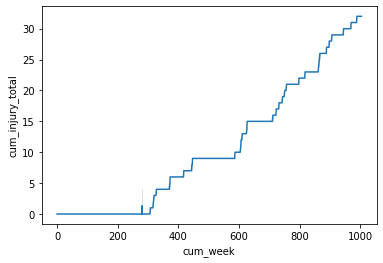

In [238]:
import seaborn as sns

sns.lineplot(data=ronaldo, x="cum_week", y="cum_injury_total")

In [87]:
injury_duration_df = new_player_df[['FBRefID', 'cum_injury_total', 'Injury','injury_count']].groupby(['FBRefID', 'cum_injury_total', 'Injury']).sum().reset_index()
injury_duration_df = injury_duration_df[injury_duration_df['Injury'] != '0'].rename(columns={'injury_count':'injury_duration'})
new_player_df_1 = pd.merge(new_player_df, injury_duration_df, left_on=['FBRefID', 'cum_injury_total', 'Injury'], right_on=['FBRefID', 'cum_injury_total', 'Injury'], how='left')
new_player_df_1['injury_duration'] = new_player_df_1['injury_duration'].fillna(0)

In [88]:
# ronaldo = new_player_df_1[new_player_df_1['FBRefID'] == 'dea698d9']
# ronaldo.to_csv('ronaldo.csv')

In [89]:
new_player_df.shape

(1680385, 66)

In [163]:
# Saving complete_final_df to Google Drive

# Renzo's path
# new_player_df.to_csv('/Volumes/GoogleDrive/.shortcut-targets-by-id/1KUGn_35OjAoOP2puz6yG-2g_8LBxvDG_/SIADS 697 - Capstone/Dataframes/complete_final_df_3.csv', index=False)

# Sravan's path
new_player_df.to_csv('/Users/srav88/My Drive/SIADS 697 - Capstone/Dataframes/complete_final_df_5.csv', index=False)